In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp

In [5]:
#Daten einlesen Hallspannung in µV
UHM=np.genfromtxt('probeconst.dat', usecols=(3))
UHP=np.genfromtxt('probeconst.dat', usecols=(6))

In [6]:
#Berechnung der ungestörten Hallspannung 
UH=0.5*(UHM-UHP)
print(UH)
UHV=UH/1000000
print(UHV)

[-1.8  -2.3  -2.7  -3.45 -4.35 -5.15 -6.05 -6.65 -7.05]
[-1.80e-06 -2.30e-06 -2.70e-06 -3.45e-06 -4.35e-06 -5.15e-06 -6.05e-06
 -6.65e-06 -7.05e-06]


In [7]:
#Berechnung der Ladungsträger pro volumen
Iq=4.01 #Querstrom in Ampere
b=ufloat(24e-3,1e-3) #Probenbreite in meter
d=ufloat(2.7e-5,1e-6) #Probendicke in meter
el=1.602176634e-19 # Elementarladung
n=(-1)*((Iq*b)/(UHV*el*d))
nmittel=np.mean(n)
print(nmittel)

(6.26+/-0.35)e+27


In [8]:
# Berechnung von tau
from math import pi
d=ufloat(1.05e-4,0.01e-4)
m=9.1093837015e-31
LD=1.37 #Länge des Drahtes
Rr=[2.5,2.7] #Rohwerte Wiederstand
Rm=np.mean(Rr)  #Mittelwert Wiederstand
Rmf=np.std(Rr) / np.sqrt(len(Rr)) # Mittelwertfehler
R=ufloat(Rm,Rmf) # Fehlerbehaftete Größe
tau=(8*m*LD)/(el*el*nmittel*pi*d*d)
print("tau= ",tau)

tau=  (1.79+/-0.11)e-12


In [9]:
#Berechnung der Driftgeschwindigkeit
vd=(-1)*(1000000)/(nmittel*el)
print("Driftgeschvindtigkeit = ", vd)

Driftgeschvindtigkeit =  -0.00100+/-0.00006


In [22]:
#Berechnung der Beweglichkeit
mu=(el*tau)/(2*m)
print("Beweglichkeit µ =",mu)

Beweglichkeit µ = 0.158+/-0.009


In [10]:
#Berechnung der totalen Geschwindigkeit
h=6.62607015e-34
EF=((h**2)/(2*m))*(((3*nmittel)/(8*pi))**(2/3)) #Fermi Energie
print("Fermi Energie = ", EF)
vtot=((2*EF)/(m))**(1/2)
print("Totale Geschwindigkeit v = ",vtot)

Fermi Energie =  (1.98+/-0.07)e-19
Totale Geschwindigkeit v =  (6.60+/-0.12)e+05


In [28]:
#Freie Wellenlänge
l=vtot*tau
print("Freie Wellenlänge = ",l)

Freie Wellenlänge =  (1.18+/-0.05)e-06


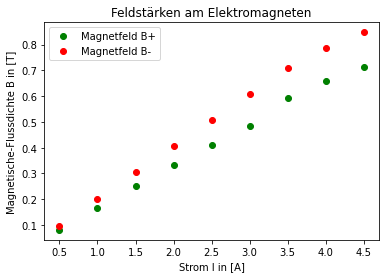

In [33]:
#Diagram Magnetfeld zeichnen
I=np.genfromtxt('datenMagnetfeld.dat', usecols=(2))
Bp=np.genfromtxt('datenMagnetfeld.dat', usecols=(3))
Bm=np.genfromtxt('datenMagnetfeld.dat', usecols=(6))
plt.plot(I,Bp,'go',label='Magnetfeld B+')
plt.plot(I,Bm,'ro',label='Magnetfeld B-')
plt.title('Feldstärken am Elektromagneten')
plt.xlabel('Strom I in [A]')
plt.ylabel('Magnetische-Flussdichte B in [T]')
plt.legend(loc="best")
plt.savefig("plot.pdf")


In [39]:
#Daten speichern
IS=np.genfromtxt('probeconst.dat', usecols=(2))
Uhallp=np.genfromtxt('probeconst.dat', usecols=(3))
Uhallm=np.genfromtxt('probeconst.dat', usecols=(6))

daten1=np.array([IS,
                Uhallp,
                Uhallm])

daten1R=np.transpose(daten1)
np.savetxt("probeconst.tex",daten1R, fmt="%2.3f", delimiter="  &   ")

IS3=np.genfromtxt('probeconst.dat', usecols=(2))
Bp=np.genfromtxt('probeconst.dat', usecols=(3))
Bm=np.genfromtxt('probeconst.dat', usecols=(6))

daten3=np.array([IS3,
                Bp,
                Bm])

daten3R=np.transpose(daten3)
np.savetxt("magnetfeld.tex",daten3R, fmt="%2.3f", delimiter="  &   ")



ValueError: Some errors were detected !
    Line #6 (got 5 columns instead of 1)
    Line #7 (got 5 columns instead of 1)
    Line #8 (got 5 columns instead of 1)

In [46]:
V=14065
N=6.02214076e23
z=(nmittel)/(V*N)
print(z)

0.74+/-0.04
